<a href="https://colab.research.google.com/github/diogobertozi/IA/blob/main/analiseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Carregar base de dados Social Media Trends
df = pd.read_csv('/content/sample_data/Viral_Social_Media_Trends.csv')

print(df.head())

  Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium  


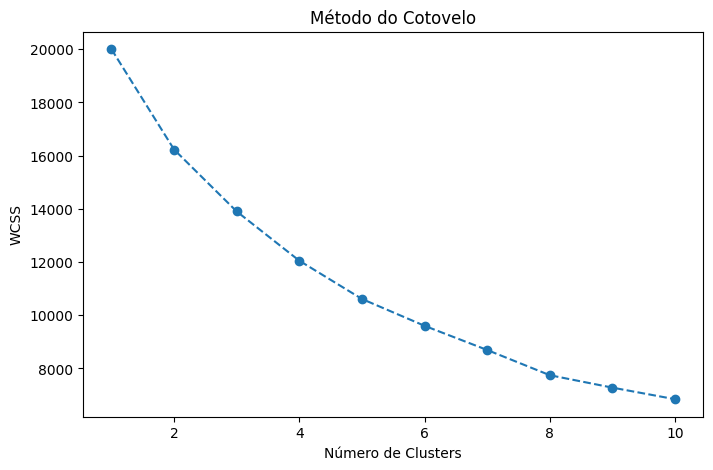

In [ ]:
# foltrar colunas numéricas para o clustering
df_num = df.select_dtypes(include=[np.number])

# Escalonar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# 2. Método do Cotovelo para encontrar o melhor número de clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')
plt.show()

In [ ]:
# 3. Aplicar K-Means com o número ótimo de clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['K-Means Cluster'] = kmeans.fit_predict(df_scaled)


In [ ]:
#4. Aplicar Clusterização Hierárquica (Linkage)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical Cluster'] = hierarchical.fit_predict(df_scaled)


In [ ]:
# 5. Visualizar os clusters com PCA (Redução para 2D)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]


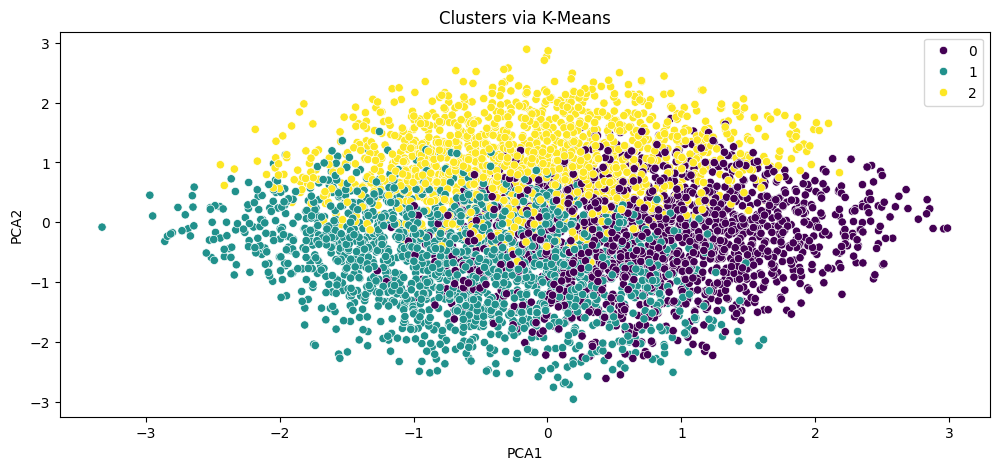

In [ ]:
#6. Gráfico K-Means
plt.figure(figsize=(12, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['K-Means Cluster'], palette='viridis', data=df)
plt.title('Clusters via K-Means')
plt.legend()
plt.show()


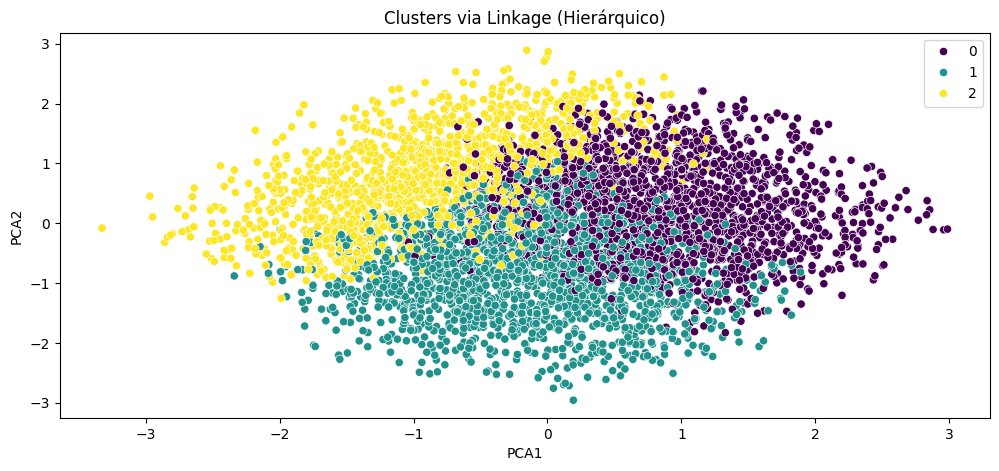

In [ ]:
#7. Gráfico Hierárquico
plt.figure(figsize=(12, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Hierarchical Cluster'], palette='viridis', data=df)
plt.title('Clusters via Linkage (Hierárquico)')
plt.legend()
plt.show()


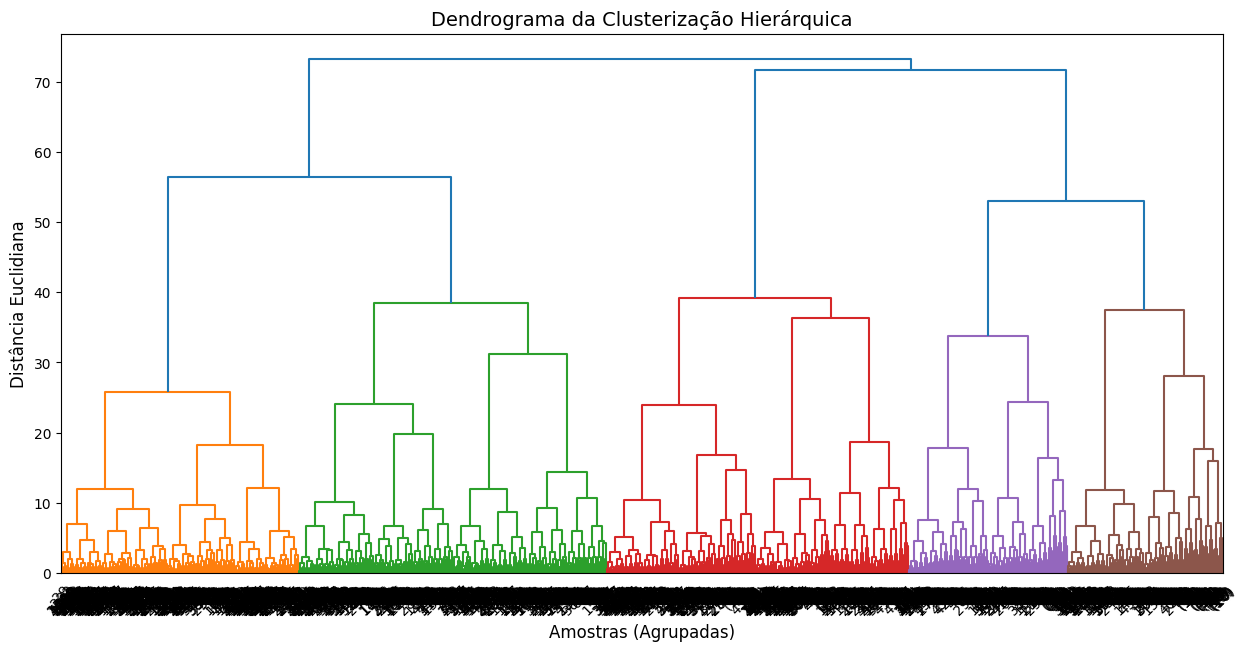

In [ ]:
# Ciar o dendrograma para visualizar a hierarquia dos clusters (melhor visualização)
plt.figure(figsize=(15, 7))
linkage_matrix = linkage(df_scaled, method='ward')

dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=10,
    leaf_rotation=45,
    leaf_font_size=10
)

plt.title('Dendrograma da Clusterização Hierárquica', fontsize=14)
plt.xlabel('Amostras (Agrupadas)', fontsize=12)
plt.ylabel('Distância Euclidiana', fontsize=12)
plt.show()

"""# Criar o dendrograma para visualizar a hierarquia dos clusters
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma da Clusterização Hierárquica')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.show()
"""